## Computational Methods - Homework 4
### Universidad de Antioquia

**Student:** Andrés Felipe Riaño Quintanilla

**ID:** 1083928808  

For small angles the period of the pendulum can be found using:

$T=2 \pi \sqrt{\frac{l}{g}}$

but for large amplitudes this equation is no longer valid and different formula has to be used:

$T=4 \sqrt{\frac{l}{g}} K(k)$ where $k=sin\left(\frac{\theta_0}{2}\right)$ ($\theta_0$ is an initial angle)

and $K$ is an eliptic integral 

$$K(k)=\int_{0}^{2 \pi} \frac{d \varphi}{\sqrt{1 - k^2 sin^2(\varphi)}}$$




Make a plot of T vs $\theta_0$

$\theta_0=[0,10,20,30,40,50,60]$ degrees

assume:
l=0.2
g=9.81

## Defining the variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
global g,l
g=9.81
l=0.2

In [2]:
def f(ϕ,θ_0):
    '''
    This is the integrand function in K(k).
    
    Parameters:
    ----------
    ϕ: float, int or numpy array.
    θ_0: float, int or numpy array. Initial angle or initial angles in degrees.
    
    Returns:
    ----------
    1/(1-((k*np.sin(ϕ))**2)**0.5): numpy array or float. Integrand function in K(k) for each initial angle.
    '''
    k=np.sin(((θ_0*np.pi)/180)*0.5)  #Lowercase k for each initial angle.
    return 1/((1-((k*np.sin(ϕ))**2))**0.5)

In [3]:
θ_0=np.linspace(0,179.9,1000)   #Initial angles in degrees.
K=np.asarray([integrate.quad(f,0,2*np.pi,args=(i,))[0] for i in θ_0])  #Capital K for each angle (The eliptic integral).
T=4*((l/g)**0.5)*K   #Period for each initial angle.

## T vs θ_0

In [4]:
#Period for θ_0=[0,10,20,30,40,50,60].

θ_i=np.asarray([0,10,20,30,40,50,60])  
K_i=np.asarray([integrate.quad(f,0,2*np.pi,args=(i,))[0] for i in θ_i])
T_i=4*((l/g)**0.5)*K_i 

<function matplotlib.pyplot.show(*args, **kw)>

findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


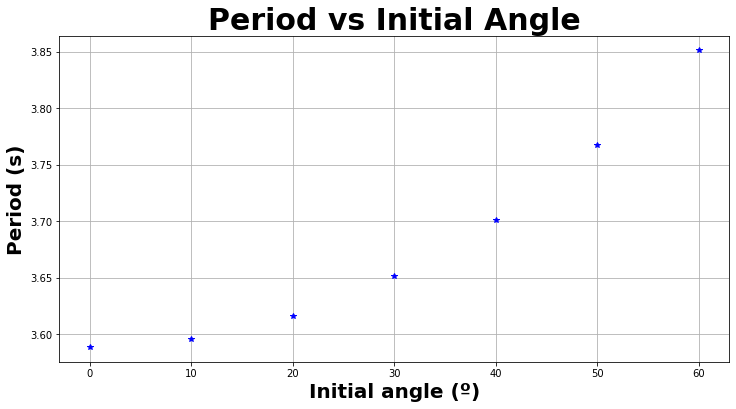

In [5]:
plt.figure(figsize=(12,6))
font1={'family':'Georgia','weight':'bold','size':30}
font2={'family':'Georgia','weight':'bold','size':20}
plt.title('Period vs Initial Angle',**font1)
#plt.plot(θ_0,T,color='red')
plt.plot(θ_i,T_i,color='blue',marker='*',linestyle='',markersize=6)
#plt.ylim(3,4)
#plt.xlim(0,80)
plt.ylabel('Period (s)',**font2)
plt.xlabel('Initial angle (º)',**font2)
plt.grid()
plt.show

Zooming in to see the smallest angles:

<function matplotlib.pyplot.show(*args, **kw)>

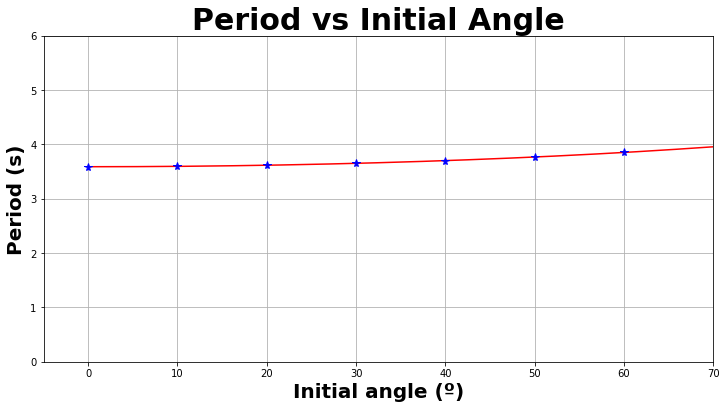

In [6]:
plt.figure(figsize=(12,6))
font1={'family':'Georgia','weight':'bold','size':30}
font2={'family':'Georgia','weight':'bold','size':20}
plt.title('Period vs Initial Angle',**font1)
plt.plot(θ_0,T,color='red')
plt.plot(θ_i,T_i,color='blue',marker='*',linestyle='',markersize=8)
plt.ylim([0,6])
plt.xlim([-5,70])
plt.ylabel('Period (s)',**font2)
plt.xlabel('Initial angle (º)',**font2)
plt.grid()
plt.show